In [2]:
import pandas as pd
import os


filename_ytrain = "../Data/Y_train_CVw08PX.csv"
filename_Xtrain = "../Data/X_train_update.csv"
filename_Xtest = "../Data/X_test_update.csv"


#print(filename_ytrain)
y_train = pd.read_csv("../Data/Y_train_CVw08PX.csv", index_col=0)
print("Y_train shape : ", y_train.shape)
X_train = pd.read_csv(filename_Xtrain, index_col=0)
print("X_train shape : ", X_train.shape)
X_test = pd.read_csv(filename_Xtest, index_col=0)
print("X_test shape : ", X_test.shape)


Y_train shape :  (84916, 1)
X_train shape :  (84916, 4)
X_test shape :  (13812, 4)


In [2]:
display(X_train.head())
X_train.isna().sum()
X_train.info()

,designation,description,productid,imageid
0,Olivia: Personalisiertes Notizbuch / 150 Seite...,NaN,3804725264,1263597046
1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L...,NaN,436067568,1008141237
2,Grand Stylet Ergonomique Bleu Gamepad Nintendo...,PILOT STYLE Touch Pen de marque Speedlink est ...,201115110,938777978
3,Peluche Donald - Europe - Disneyland 2000 (Mar...,NaN,50418756,457047496
4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut or...,278535884,1077757786


<class 'pandas.core.frame.DataFrame'>
Index: 84916 entries, 0 to 84915
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   designation  84916 non-null  object
 1   description  55116 non-null  object
 2   productid    84916 non-null  int64 
 3   imageid      84916 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.2+ MB


prdtypecode
2583    10209
1560     5073
1300     5045
2060     4993
2522     4989
1280     4870
2403     4774
2280     4760
1920     4303
1160     3953
1320     3241
10       3116
2705     2761
1140     2671
2582     2589
40       2508
2585     2496
1302     2491
1281     2070
50       1681
2462     1421
2905      872
60        832
2220      824
1301      807
1940      803
1180      764
Name: count, dtype: int64

Nb de code category =  27


/tmp/ipykernel_2135/2855605154.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_count.index, y=y_train_count.values, order=y_train_count.index, palette='viridis')


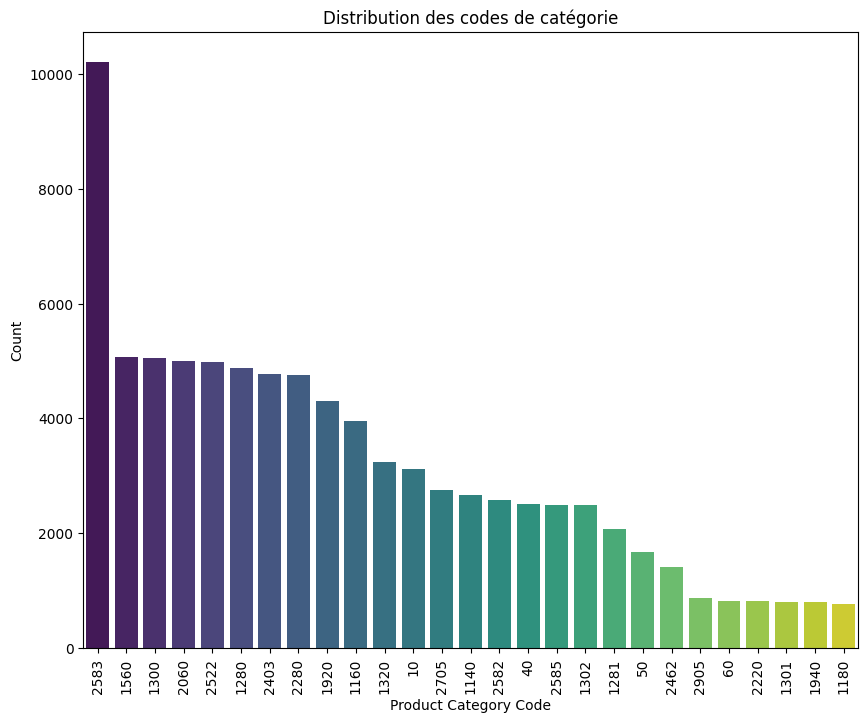

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

y_train_count = y_train['prdtypecode'].value_counts().sort_values(ascending=False)
display(y_train_count)
print("Nb de code category = ", tmp.shape[0])
#print(tmp.index)
#print(tmp.values)
#plt.bar(height=tmp, x=tmp.index, width=0.8)
#plt.show()
plt.figure(figsize=(10,8))
sns.barplot(x=y_train_count.index, y=y_train_count.values, order=y_train_count.index, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Product Category Code")
plt.ylabel("Count")
plt.title("Distribution des codes de catégorie")
plt.show()

prdtypecode
2583    1020900
1560     507300
1300     504500
2060     499300
2522     498900
1280     487000
2403     477400
2280     476000
1920     430300
1160     395300
1320     324100
10       311600
2705     276100
1140     267100
2582     258900
40       250800
2585     249600
1302     249100
1281     207000
50       168100
2462     142100
2905      87200
60        83200
2220      82400
1301      80700
1940      80300
1180      76400
Name: count, dtype: int64

Nb de code category =  27


/tmp/ipykernel_2135/3504794423.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train_count_p.index, y=y_train_count_p.values, order=y_train_count_p.index, palette='viridis')


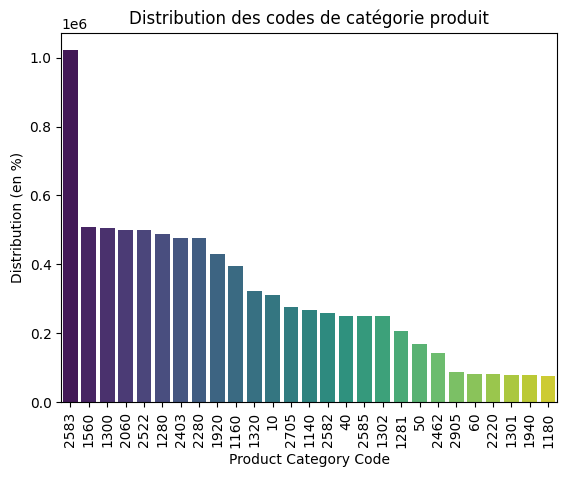

In [56]:
y_train_count_p = y_train['prdtypecode'].value_counts(normalize=True).sort_values(ascending=False)
y_train_count_p = y_train_count*100
display(y_train_count_p)
print("Nb de code category = ", tmp.shape[0])
sns.barplot(x=y_train_count_p.index, y=y_train_count_p.values, order=y_train_count_p.index, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Product Category Code")
plt.ylabel("Distribution (en %)")
plt.title("Distribution des codes de catégorie produit")
plt.show()

In [29]:
filtre = y_train.loc[y_train['prdtypecode'] == 1180]
product_1180 = X_train.iloc[filtre.index,:]
#filtre
product_1180.head(20)

,designation,description,productid,imageid
22,Le Seigneur Des Anneaux Figurine En Plomb À Pe...,NaN,1893048509,1110089245
41,Présentoir À Biscuits Et Chocolats,NaN,1548294503,1092313319
106,Comtes Vampires Lahmiane À Pied Et Montée Lahm...,NaN,4187799604,1312712907
154,Mournblade - Ecran Et Cartes Des Jeunes Royaumes,NaN,4180534759,1309774406
524,Warhammer 40000 ( 40k ) - Exo Armure Xv88 Broa...,Ce kit contient 91 composants en plastique ain...,255257554,968831698
666,Greyhawk Ad&d The Adventure Begins,NaN,3404365132,1211830337
721,Rage Across The Amazon,NaN,18063547,345655117
747,Masque Halloween Masques Led Glow Light Up Mas...,Masque Halloween LED Masques Glow Masque Effra...,4151009771,1301850198
764,Vert Intérieur P010 Gamme Air - Pot De 17ml - ...,NaN,273333595,975261028
999,Red Steel - Savage Baronies,<br />Daring swashbucklers.<br />Stout mercena...,76198034,846816060


,count,nb_isna,ratio_isna,ratio_var
prdtypecode,,,,
2583,10209,903,8.845137,12.022469
1560,5073,177,3.489060,5.974139
1300,5045,1173,23.250743,5.941165
2060,4993,286,5.728019,5.879928
2522,4989,1189,23.832431,5.875218
1280,4870,1068,21.930185,5.735079
2403,4774,4648,97.360704,5.622026
2280,4760,4440,93.277311,5.605540
1920,4303,207,4.810597,5.067361


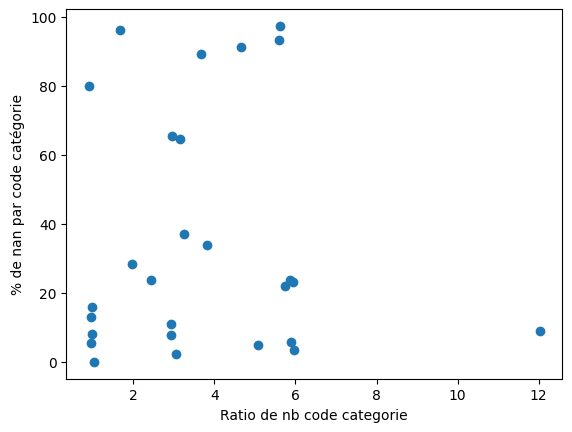

In [74]:

#index_xt = X_train.index
#index_yt = y_train.index
#diff = index_xt - index_yt

#df = pd.concat([X_train, y_train], axis=1)
df.head()

xtrain_isna = X_train.isna()
df = pd.concat([xtrain_isna, y_train], axis=1)
tmp = df.groupby('prdtypecode')['description'].agg('sum')
tmp
#sns.barplot(x=tmp.index, y=tmp.values, order=tmp.index, palette='viridis')
#plt.xticks(rotation=90)
#plt.xlabel("Product Category Code")
#plt.ylabel("Distribution (en %)")
#plt.title("Distribution des codes de catégorie produit")

eval_isna = pd.DataFrame(data=y_train_count, index=y_train_count.index)
eval_isna['nb_isna'] = eval_isna.apply(lambda x: tmp[x.index])
eval_isna['ratio_isna'] = eval_isna['nb_isna'] / eval_isna['count'] * 100.
eval_isna['ratio_var'] = eval_isna['count'] / X_train.shape[0] * 100.
display(eval_isna.head(27))

plt.scatter(x=eval_isna['ratio_var'], y=eval_isna['ratio_isna'])
plt.xlabel('Ratio de nb code categorie')
plt.ylabel('% de nan par code catégorie')
plt.show()

